# 好坏质检二分类mlp实战
基于data.csv数据，建立mlp模型，计算其在测试数据上的准确率，可视化模型预测结果：  
1、进行数据分离：test_size=0.33,random_state=10  
2、模型结构：一层隐藏层，有20个神经元  

In [1]:
#load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,0.0323,0.0244,1
1,0.0887,0.0244,1
2,0.1690,0.0163,1
3,0.2420,0.0000,1
4,0.2420,0.0488,1


Text(0.5, 1.0, 'raw data')

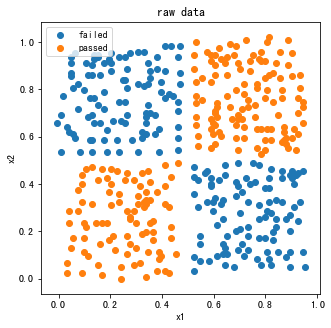

In [2]:
#define the X and y
X = data.drop(['y'], axis=1)
y = data['y']
#visualize the data
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
failed = ax.scatter(X['x1'][y == 0], X['x2'][y == 0])
passed = ax.scatter(X['x1'][y == 1], X['x2'][y == 1])
ax.legend((failed, passed), ('failed', 'passed'))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('raw data')

In [8]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=10)
#set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation
mlp = Sequential()
#通过.add()叠加各层网络
mlp.add(Dense(units=20, input_dim=2, activation='sigmoid'))
mlp.add(Dense(units=1, activation='sigmoid'))
#查看模型结构
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [4]:
#compile the model
#通过.compile()配置模型求解过程参数
mlp.compile(optimizer='adam', loss='binary_crossentropy')
#train the model
mlp.fit(X_train, y_train, epochs=3000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/3000
275/275 [==============================] - 1s 4ms/step - loss: 0.7044
Epoch 2/3000
275/275 [==============================] - 0s 153us/step - loss: 0.6989
Epoch 3/3000
275/275 [==============================] - 0s 154us/step - loss: 0.6945
Epoch 4/3000
275/275 [==============================] - 0s 160us/step - loss: 0.6935
Epoch 5/3000
275/275 [==============================] - 0s 172us/step - loss: 0.6919
Epoch 6/3000
275/275 [==============================] - 0s 157us/step - loss: 0.6916
Epoch 7/3000
275/275 [==============================] - 0s 163us/step - loss: 0.6917
Epoch 8/3000
275/275 [==============================] - 0s 120us/step - loss: 0.6913
Epoch 9/3000
275/275 [==============================] - 0s 128us/step - loss: 0.6914
Epoch 10/3000
275/275 [==============================] - 0s 177us/step - loss: 0.6913
Epoch 11/3000
275/275 [==============================] -

275/275 [==============================] - 0s 185us/step - loss: 0.6905
Epoch 90/3000
275/275 [==============================] - 0s 170us/step - loss: 0.6901
Epoch 91/3000
275/275 [==============================] - 0s 138us/step - loss: 0.6902
Epoch 92/3000
275/275 [==============================] - 0s 124us/step - loss: 0.6904
Epoch 93/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6901
Epoch 94/3000
275/275 [==============================] - 0s 121us/step - loss: 0.6901
Epoch 95/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6901
Epoch 96/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6901
Epoch 97/3000
275/275 [==============================] - 0s 116us/step - loss: 0.6901
Epoch 98/3000
275/275 [==============================] - 0s 142us/step - loss: 0.6900
Epoch 99/3000
275/275 [==============================] - 0s 196us/step - loss: 0.6904
Epoch 100/3000
275/275 [==============================] - 0s 152us/s

275/275 [==============================] - 0s 155us/step - loss: 0.6895
Epoch 184/3000
275/275 [==============================] - 0s 147us/step - loss: 0.6895
Epoch 185/3000
275/275 [==============================] - 0s 125us/step - loss: 0.6895
Epoch 186/3000
275/275 [==============================] - 0s 152us/step - loss: 0.6896
Epoch 187/3000
275/275 [==============================] - 0s 153us/step - loss: 0.6895
Epoch 188/3000
275/275 [==============================] - 0s 134us/step - loss: 0.6895
Epoch 189/3000
275/275 [==============================] - 0s 136us/step - loss: 0.6895
Epoch 190/3000
275/275 [==============================] - 0s 173us/step - loss: 0.6896
Epoch 191/3000
275/275 [==============================] - 0s 140us/step - loss: 0.6894
Epoch 192/3000
275/275 [==============================] - 0s 133us/step - loss: 0.6894
Epoch 193/3000
275/275 [==============================] - 0s 135us/step - loss: 0.6897
Epoch 194/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 116us/step - loss: 0.6895
Epoch 278/3000
275/275 [==============================] - 0s 109us/step - loss: 0.6891
Epoch 279/3000
275/275 [==============================] - 0s 117us/step - loss: 0.6891
Epoch 280/3000
275/275 [==============================] - 0s 107us/step - loss: 0.6892
Epoch 281/3000
275/275 [==============================] - 0s 105us/step - loss: 0.6892
Epoch 282/3000
275/275 [==============================] - 0s 130us/step - loss: 0.6892
Epoch 283/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6892
Epoch 284/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6893
Epoch 285/3000
275/275 [==============================] - 0s 105us/step - loss: 0.6892
Epoch 286/3000
275/275 [==============================] - 0s 105us/step - loss: 0.6891
Epoch 287/3000
275/275 [==============================] - 0s 108us/step - loss: 0.6894
Epoch 288/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 112us/step - loss: 0.6891
Epoch 372/3000
275/275 [==============================] - 0s 128us/step - loss: 0.6890
Epoch 373/3000
275/275 [==============================] - 0s 123us/step - loss: 0.6890
Epoch 374/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6889
Epoch 375/3000
275/275 [==============================] - 0s 107us/step - loss: 0.6890
Epoch 376/3000
275/275 [==============================] - 0s 108us/step - loss: 0.6889
Epoch 377/3000
275/275 [==============================] - 0s 106us/step - loss: 0.6890
Epoch 378/3000
275/275 [==============================] - 0s 111us/step - loss: 0.6889
Epoch 379/3000
275/275 [==============================] - 0s 122us/step - loss: 0.6890
Epoch 380/3000
275/275 [==============================] - 0s 111us/step - loss: 0.6889
Epoch 381/3000
275/275 [==============================] - 0s 110us/step - loss: 0.6890
Epoch 382/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 155us/step - loss: 0.6888
Epoch 466/3000
275/275 [==============================] - 0s 157us/step - loss: 0.6887
Epoch 467/3000
275/275 [==============================] - 0s 126us/step - loss: 0.6887
Epoch 468/3000
275/275 [==============================] - 0s 141us/step - loss: 0.6887
Epoch 469/3000
275/275 [==============================] - 0s 162us/step - loss: 0.6889
Epoch 470/3000
275/275 [==============================] - 0s 153us/step - loss: 0.6887
Epoch 471/3000
275/275 [==============================] - 0s 152us/step - loss: 0.6888
Epoch 472/3000
275/275 [==============================] - 0s 123us/step - loss: 0.6888
Epoch 473/3000
275/275 [==============================] - 0s 127us/step - loss: 0.6891
Epoch 474/3000
275/275 [==============================] - 0s 124us/step - loss: 0.6887
Epoch 475/3000
275/275 [==============================] - 0s 122us/step - loss: 0.6887
Epoch 476/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 135us/step - loss: 0.6887
Epoch 560/3000
275/275 [==============================] - 0s 146us/step - loss: 0.6887
Epoch 561/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6887
Epoch 562/3000
275/275 [==============================] - 0s 105us/step - loss: 0.6887
Epoch 563/3000
275/275 [==============================] - 0s 101us/step - loss: 0.6887
Epoch 564/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6887
Epoch 565/3000
275/275 [==============================] - 0s 124us/step - loss: 0.6885
Epoch 566/3000
275/275 [==============================] - 0s 105us/step - loss: 0.6887
Epoch 567/3000
275/275 [==============================] - 0s 107us/step - loss: 0.6886
Epoch 568/3000
275/275 [==============================] - 0s 109us/step - loss: 0.6885
Epoch 569/3000
275/275 [==============================] - 0s 109us/step - loss: 0.6890
Epoch 570/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 122us/step - loss: 0.6882
Epoch 654/3000
275/275 [==============================] - 0s 119us/step - loss: 0.6883
Epoch 655/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6884
Epoch 656/3000
275/275 [==============================] - 0s 110us/step - loss: 0.6884
Epoch 657/3000
275/275 [==============================] - 0s 110us/step - loss: 0.6883
Epoch 658/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6883
Epoch 659/3000
275/275 [==============================] - 0s 101us/step - loss: 0.6888
Epoch 660/3000
275/275 [==============================] - 0s 98us/step - loss: 0.6883
Epoch 661/3000
275/275 [==============================] - 0s 93us/step - loss: 0.6887
Epoch 662/3000
275/275 [==============================] - 0s 95us/step - loss: 0.6883
Epoch 663/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6882
Epoch 664/3000
275/275 [==============================] - 0s 1

275/275 [==============================] - 0s 138us/step - loss: 0.6881
Epoch 748/3000
275/275 [==============================] - 0s 126us/step - loss: 0.6886
Epoch 749/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6879
Epoch 750/3000
275/275 [==============================] - 0s 98us/step - loss: 0.6883
Epoch 751/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6882
Epoch 752/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6879
Epoch 753/3000
275/275 [==============================] - 0s 97us/step - loss: 0.6878
Epoch 754/3000
275/275 [==============================] - 0s 96us/step - loss: 0.6879
Epoch 755/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6879
Epoch 756/3000
275/275 [==============================] - 0s 106us/step - loss: 0.6878
Epoch 757/3000
275/275 [==============================] - 0s 112us/step - loss: 0.6879
Epoch 758/3000
275/275 [==============================] - 0s 9

275/275 [==============================] - 0s 118us/step - loss: 0.6872
Epoch 842/3000
275/275 [==============================] - 0s 115us/step - loss: 0.6871
Epoch 843/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6873
Epoch 844/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6872
Epoch 845/3000
275/275 [==============================] - 0s 107us/step - loss: 0.6870
Epoch 846/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6871
Epoch 847/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6871
Epoch 848/3000
275/275 [==============================] - 0s 101us/step - loss: 0.6872
Epoch 849/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6874
Epoch 850/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6872
Epoch 851/3000
275/275 [==============================] - 0s 163us/step - loss: 0.6871
Epoch 852/3000
275/275 [==============================] - 

275/275 [==============================] - 0s 138us/step - loss: 0.6864
Epoch 936/3000
275/275 [==============================] - 0s 139us/step - loss: 0.6860
Epoch 937/3000
275/275 [==============================] - 0s 108us/step - loss: 0.6861
Epoch 938/3000
275/275 [==============================] - 0s 119us/step - loss: 0.6861
Epoch 939/3000
275/275 [==============================] - 0s 111us/step - loss: 0.6860
Epoch 940/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6859
Epoch 941/3000
275/275 [==============================] - 0s 104us/step - loss: 0.6858
Epoch 942/3000
275/275 [==============================] - 0s 95us/step - loss: 0.6858
Epoch 943/3000
275/275 [==============================] - 0s 93us/step - loss: 0.6857
Epoch 944/3000
275/275 [==============================] - 0s 93us/step - loss: 0.6859
Epoch 945/3000
275/275 [==============================] - 0s 94us/step - loss: 0.6859
Epoch 946/3000
275/275 [==============================] - 0s 1

275/275 [==============================] - 0s 139us/step - loss: 0.6835
Epoch 1030/3000
275/275 [==============================] - 0s 144us/step - loss: 0.6836
Epoch 1031/3000
275/275 [==============================] - 0s 142us/step - loss: 0.6842
Epoch 1032/3000
275/275 [==============================] - 0s 144us/step - loss: 0.6837
Epoch 1033/3000
275/275 [==============================] - 0s 166us/step - loss: 0.6836
Epoch 1034/3000
275/275 [==============================] - 0s 156us/step - loss: 0.6835
Epoch 1035/3000
275/275 [==============================] - 0s 148us/step - loss: 0.6835
Epoch 1036/3000
275/275 [==============================] - 0s 152us/step - loss: 0.6835
Epoch 1037/3000
275/275 [==============================] - 0s 137us/step - loss: 0.6835
Epoch 1038/3000
275/275 [==============================] - 0s 143us/step - loss: 0.6834
Epoch 1039/3000
275/275 [==============================] - 0s 145us/step - loss: 0.6833
Epoch 1040/3000
275/275 [=======================

275/275 [==============================] - 0s 125us/step - loss: 0.6798
Epoch 1123/3000
275/275 [==============================] - 0s 136us/step - loss: 0.6796
Epoch 1124/3000
275/275 [==============================] - 0s 98us/step - loss: 0.6796
Epoch 1125/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6794
Epoch 1126/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6793
Epoch 1127/3000
275/275 [==============================] - 0s 107us/step - loss: 0.6793
Epoch 1128/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6793
Epoch 1129/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6791
Epoch 1130/3000
275/275 [==============================] - 0s 101us/step - loss: 0.6790
Epoch 1131/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6791
Epoch 1132/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6789
Epoch 1133/3000
275/275 [==========================

275/275 [==============================] - 0s 120us/step - loss: 0.6724
Epoch 1216/3000
275/275 [==============================] - 0s 121us/step - loss: 0.6722
Epoch 1217/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6722
Epoch 1218/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6723
Epoch 1219/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6718
Epoch 1220/3000
275/275 [==============================] - 0s 108us/step - loss: 0.6718
Epoch 1221/3000
275/275 [==============================] - 0s 95us/step - loss: 0.6717
Epoch 1222/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6715
Epoch 1223/3000
275/275 [==============================] - 0s 98us/step - loss: 0.6716
Epoch 1224/3000
275/275 [==============================] - 0s 108us/step - loss: 0.6713
Epoch 1225/3000
275/275 [==============================] - 0s 97us/step - loss: 0.6713
Epoch 1226/3000
275/275 [==========================

275/275 [==============================] - 0s 116us/step - loss: 0.6600
Epoch 1309/3000
275/275 [==============================] - 0s 115us/step - loss: 0.6598
Epoch 1310/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6595
Epoch 1311/3000
275/275 [==============================] - 0s 101us/step - loss: 0.6595
Epoch 1312/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6593
Epoch 1313/3000
275/275 [==============================] - 0s 99us/step - loss: 0.6589
Epoch 1314/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6590
Epoch 1315/3000
275/275 [==============================] - 0s 103us/step - loss: 0.6588
Epoch 1316/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6586
Epoch 1317/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6585
Epoch 1318/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6582
Epoch 1319/3000
275/275 [=========================

275/275 [==============================] - 0s 121us/step - loss: 0.6404
Epoch 1402/3000
275/275 [==============================] - 0s 124us/step - loss: 0.6400
Epoch 1403/3000
275/275 [==============================] - 0s 121us/step - loss: 0.6396
Epoch 1404/3000
275/275 [==============================] - 0s 109us/step - loss: 0.6394
Epoch 1405/3000
275/275 [==============================] - 0s 122us/step - loss: 0.6392
Epoch 1406/3000
275/275 [==============================] - 0s 123us/step - loss: 0.6391
Epoch 1407/3000
275/275 [==============================] - 0s 198us/step - loss: 0.6393
Epoch 1408/3000
275/275 [==============================] - 0s 98us/step - loss: 0.6383
Epoch 1409/3000
275/275 [==============================] - 0s 100us/step - loss: 0.6385
Epoch 1410/3000
275/275 [==============================] - 0s 102us/step - loss: 0.6378
Epoch 1411/3000
275/275 [==============================] - 0s 112us/step - loss: 0.6375
Epoch 1412/3000
275/275 [========================

275/275 [==============================] - 0s 136us/step - loss: 0.6126
Epoch 1495/3000
275/275 [==============================] - 0s 163us/step - loss: 0.6119
Epoch 1496/3000
275/275 [==============================] - 0s 125us/step - loss: 0.6115
Epoch 1497/3000
275/275 [==============================] - 0s 135us/step - loss: 0.6112
Epoch 1498/3000
275/275 [==============================] - 0s 141us/step - loss: 0.6108
Epoch 1499/3000
275/275 [==============================] - 0s 122us/step - loss: 0.6104
Epoch 1500/3000
275/275 [==============================] - 0s 134us/step - loss: 0.6100
Epoch 1501/3000
275/275 [==============================] - 0s 127us/step - loss: 0.6097
Epoch 1502/3000
275/275 [==============================] - 0s 126us/step - loss: 0.6096
Epoch 1503/3000
275/275 [==============================] - 0s 131us/step - loss: 0.6091
Epoch 1504/3000
275/275 [==============================] - 0s 127us/step - loss: 0.6086
Epoch 1505/3000
275/275 [=======================

275/275 [==============================] - 0s 101us/step - loss: 0.5751
Epoch 1588/3000
275/275 [==============================] - 0s 108us/step - loss: 0.5746
Epoch 1589/3000
275/275 [==============================] - 0s 128us/step - loss: 0.5743
Epoch 1590/3000
275/275 [==============================] - 0s 109us/step - loss: 0.5735
Epoch 1591/3000
275/275 [==============================] - 0s 125us/step - loss: 0.5735
Epoch 1592/3000
275/275 [==============================] - 0s 120us/step - loss: 0.5727
Epoch 1593/3000
275/275 [==============================] - 0s 143us/step - loss: 0.5722
Epoch 1594/3000
275/275 [==============================] - 0s 136us/step - loss: 0.5717
Epoch 1595/3000
275/275 [==============================] - 0s 134us/step - loss: 0.5714
Epoch 1596/3000
275/275 [==============================] - 0s 126us/step - loss: 0.5712
Epoch 1597/3000
275/275 [==============================] - 0s 125us/step - loss: 0.5705
Epoch 1598/3000
275/275 [=======================

275/275 [==============================] - 0s 134us/step - loss: 0.5288
Epoch 1681/3000
275/275 [==============================] - 0s 129us/step - loss: 0.5285
Epoch 1682/3000
275/275 [==============================] - 0s 107us/step - loss: 0.5277
Epoch 1683/3000
275/275 [==============================] - 0s 113us/step - loss: 0.5272
Epoch 1684/3000
275/275 [==============================] - 0s 100us/step - loss: 0.5270
Epoch 1685/3000
275/275 [==============================] - 0s 104us/step - loss: 0.5264
Epoch 1686/3000
275/275 [==============================] - 0s 106us/step - loss: 0.5256
Epoch 1687/3000
275/275 [==============================] - 0s 104us/step - loss: 0.5250
Epoch 1688/3000
275/275 [==============================] - 0s 108us/step - loss: 0.5249
Epoch 1689/3000
275/275 [==============================] - 0s 104us/step - loss: 0.5241
Epoch 1690/3000
275/275 [==============================] - 0s 107us/step - loss: 0.5235
Epoch 1691/3000
275/275 [=======================

275/275 [==============================] - 0s 115us/step - loss: 0.4775
Epoch 1774/3000
275/275 [==============================] - 0s 125us/step - loss: 0.4766
Epoch 1775/3000
275/275 [==============================] - 0s 103us/step - loss: 0.4759
Epoch 1776/3000
275/275 [==============================] - 0s 97us/step - loss: 0.4754
Epoch 1777/3000
275/275 [==============================] - 0s 100us/step - loss: 0.4749
Epoch 1778/3000
275/275 [==============================] - 0s 99us/step - loss: 0.4742
Epoch 1779/3000
275/275 [==============================] - 0s 98us/step - loss: 0.4738
Epoch 1780/3000
275/275 [==============================] - 0s 100us/step - loss: 0.4731
Epoch 1781/3000
275/275 [==============================] - 0s 99us/step - loss: 0.4726
Epoch 1782/3000
275/275 [==============================] - 0s 112us/step - loss: 0.4719
Epoch 1783/3000
275/275 [==============================] - 0s 150us/step - loss: 0.4713
Epoch 1784/3000
275/275 [===========================

275/275 [==============================] - 0s 147us/step - loss: 0.4242
Epoch 1867/3000
275/275 [==============================] - 0s 150us/step - loss: 0.4234
Epoch 1868/3000
275/275 [==============================] - 0s 151us/step - loss: 0.4230
Epoch 1869/3000
275/275 [==============================] - 0s 135us/step - loss: 0.4224
Epoch 1870/3000
275/275 [==============================] - 0s 150us/step - loss: 0.4220
Epoch 1871/3000
275/275 [==============================] - 0s 125us/step - loss: 0.4213
Epoch 1872/3000
275/275 [==============================] - 0s 132us/step - loss: 0.4207
Epoch 1873/3000
275/275 [==============================] - 0s 153us/step - loss: 0.4204
Epoch 1874/3000
275/275 [==============================] - 0s 141us/step - loss: 0.4198
Epoch 1875/3000
275/275 [==============================] - 0s 121us/step - loss: 0.4191
Epoch 1876/3000
275/275 [==============================] - 0s 101us/step - loss: 0.4186
Epoch 1877/3000
275/275 [=======================

275/275 [==============================] - 0s 115us/step - loss: 0.3762
Epoch 1960/3000
275/275 [==============================] - 0s 108us/step - loss: 0.3758
Epoch 1961/3000
275/275 [==============================] - 0s 95us/step - loss: 0.3753
Epoch 1962/3000
275/275 [==============================] - 0s 94us/step - loss: 0.3748
Epoch 1963/3000
275/275 [==============================] - 0s 99us/step - loss: 0.3743
Epoch 1964/3000
275/275 [==============================] - 0s 98us/step - loss: 0.3739
Epoch 1965/3000
275/275 [==============================] - 0s 96us/step - loss: 0.3734
Epoch 1966/3000
275/275 [==============================] - 0s 99us/step - loss: 0.3729
Epoch 1967/3000
275/275 [==============================] - 0s 107us/step - loss: 0.3725
Epoch 1968/3000
275/275 [==============================] - 0s 108us/step - loss: 0.3720
Epoch 1969/3000
275/275 [==============================] - 0s 120us/step - loss: 0.3715
Epoch 1970/3000
275/275 [=============================

275/275 [==============================] - 0s 136us/step - loss: 0.3356
Epoch 2053/3000
275/275 [==============================] - 0s 117us/step - loss: 0.3352
Epoch 2054/3000
275/275 [==============================] - 0s 97us/step - loss: 0.3348
Epoch 2055/3000
275/275 [==============================] - 0s 89us/step - loss: 0.3344
Epoch 2056/3000
275/275 [==============================] - 0s 93us/step - loss: 0.3340
Epoch 2057/3000
275/275 [==============================] - 0s 92us/step - loss: 0.3336
Epoch 2058/3000
275/275 [==============================] - 0s 95us/step - loss: 0.3332
Epoch 2059/3000
275/275 [==============================] - 0s 101us/step - loss: 0.3328
Epoch 2060/3000
275/275 [==============================] - 0s 101us/step - loss: 0.3325
Epoch 2061/3000
275/275 [==============================] - 0s 102us/step - loss: 0.3321
Epoch 2062/3000
275/275 [==============================] - 0s 101us/step - loss: 0.3319
Epoch 2063/3000
275/275 [============================

275/275 [==============================] - 0s 118us/step - loss: 0.3028
Epoch 2146/3000
275/275 [==============================] - 0s 107us/step - loss: 0.3026
Epoch 2147/3000
275/275 [==============================] - 0s 95us/step - loss: 0.3023
Epoch 2148/3000
275/275 [==============================] - 0s 107us/step - loss: 0.3018
Epoch 2149/3000
275/275 [==============================] - 0s 94us/step - loss: 0.3016
Epoch 2150/3000
275/275 [==============================] - 0s 101us/step - loss: 0.3012
Epoch 2151/3000
275/275 [==============================] - 0s 103us/step - loss: 0.3010
Epoch 2152/3000
275/275 [==============================] - 0s 107us/step - loss: 0.3006
Epoch 2153/3000
275/275 [==============================] - 0s 98us/step - loss: 0.3003
Epoch 2154/3000
275/275 [==============================] - 0s 102us/step - loss: 0.3001
Epoch 2155/3000
275/275 [==============================] - 0s 112us/step - loss: 0.2997
Epoch 2156/3000
275/275 [==========================

275/275 [==============================] - 0s 125us/step - loss: 0.2776
Epoch 2239/3000
275/275 [==============================] - 0s 119us/step - loss: 0.2774
Epoch 2240/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2770
Epoch 2241/3000
275/275 [==============================] - 0s 92us/step - loss: 0.2768
Epoch 2242/3000
275/275 [==============================] - 0s 92us/step - loss: 0.2766
Epoch 2243/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2763
Epoch 2244/3000
275/275 [==============================] - 0s 94us/step - loss: 0.2760
Epoch 2245/3000
275/275 [==============================] - 0s 92us/step - loss: 0.2760
Epoch 2246/3000
275/275 [==============================] - 0s 94us/step - loss: 0.2756
Epoch 2247/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2753
Epoch 2248/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2751
Epoch 2249/3000
275/275 [==============================] 

275/275 [==============================] - 0s 118us/step - loss: 0.2579
Epoch 2332/3000
275/275 [==============================] - 0s 117us/step - loss: 0.2578
Epoch 2333/3000
275/275 [==============================] - 0s 101us/step - loss: 0.2577
Epoch 2334/3000
275/275 [==============================] - 0s 109us/step - loss: 0.2573
Epoch 2335/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2572
Epoch 2336/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2570
Epoch 2337/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2568
Epoch 2338/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2567
Epoch 2339/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2564
Epoch 2340/3000
275/275 [==============================] - 0s 103us/step - loss: 0.2563
Epoch 2341/3000
275/275 [==============================] - 0s 110us/step - loss: 0.2561
Epoch 2342/3000
275/275 [============================

275/275 [==============================] - 0s 132us/step - loss: 0.2424
Epoch 2425/3000
275/275 [==============================] - 0s 115us/step - loss: 0.2423
Epoch 2426/3000
275/275 [==============================] - 0s 90us/step - loss: 0.2421
Epoch 2427/3000
275/275 [==============================] - 0s 96us/step - loss: 0.2421
Epoch 2428/3000
275/275 [==============================] - 0s 92us/step - loss: 0.2422
Epoch 2429/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2418
Epoch 2430/3000
275/275 [==============================] - 0s 92us/step - loss: 0.2416
Epoch 2431/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2415
Epoch 2432/3000
275/275 [==============================] - 0s 97us/step - loss: 0.2414
Epoch 2433/3000
275/275 [==============================] - 0s 102us/step - loss: 0.2411
Epoch 2434/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2412
Epoch 2435/3000
275/275 [==============================]

275/275 [==============================] - 0s 108us/step - loss: 0.2299
Epoch 2518/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2298
Epoch 2519/3000
275/275 [==============================] - 0s 93us/step - loss: 0.2297
Epoch 2520/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2300
Epoch 2521/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2296
Epoch 2522/3000
275/275 [==============================] - 0s 96us/step - loss: 0.2295
Epoch 2523/3000
275/275 [==============================] - 0s 112us/step - loss: 0.2295
Epoch 2524/3000
275/275 [==============================] - 0s 107us/step - loss: 0.2293
Epoch 2525/3000
275/275 [==============================] - 0s 109us/step - loss: 0.2292
Epoch 2526/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2288
Epoch 2527/3000
275/275 [==============================] - 0s 98us/step - loss: 0.2287
Epoch 2528/3000
275/275 [==============================

275/275 [==============================] - 0s 116us/step - loss: 0.2194
Epoch 2611/3000
275/275 [==============================] - 0s 112us/step - loss: 0.2194
Epoch 2612/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2193
Epoch 2613/3000
275/275 [==============================] - 0s 96us/step - loss: 0.2191
Epoch 2614/3000
275/275 [==============================] - 0s 94us/step - loss: 0.2190
Epoch 2615/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2189
Epoch 2616/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2188
Epoch 2617/3000
275/275 [==============================] - 0s 101us/step - loss: 0.2187
Epoch 2618/3000
275/275 [==============================] - 0s 105us/step - loss: 0.2186
Epoch 2619/3000
275/275 [==============================] - 0s 103us/step - loss: 0.2185
Epoch 2620/3000
275/275 [==============================] - 0s 113us/step - loss: 0.2184
Epoch 2621/3000
275/275 [============================

275/275 [==============================] - 0s 118us/step - loss: 0.2103
Epoch 2704/3000
275/275 [==============================] - 0s 119us/step - loss: 0.2104
Epoch 2705/3000
275/275 [==============================] - 0s 101us/step - loss: 0.2101
Epoch 2706/3000
275/275 [==============================] - 0s 116us/step - loss: 0.2101
Epoch 2707/3000
275/275 [==============================] - 0s 111us/step - loss: 0.2099
Epoch 2708/3000
275/275 [==============================] - 0s 108us/step - loss: 0.2099
Epoch 2709/3000
275/275 [==============================] - 0s 95us/step - loss: 0.2099
Epoch 2710/3000
275/275 [==============================] - 0s 105us/step - loss: 0.2097
Epoch 2711/3000
275/275 [==============================] - 0s 113us/step - loss: 0.2096
Epoch 2712/3000
275/275 [==============================] - 0s 104us/step - loss: 0.2095
Epoch 2713/3000
275/275 [==============================] - 0s 103us/step - loss: 0.2094
Epoch 2714/3000
275/275 [========================

275/275 [==============================] - 0s 116us/step - loss: 0.2026
Epoch 2797/3000
275/275 [==============================] - 0s 129us/step - loss: 0.2021
Epoch 2798/3000
275/275 [==============================] - 0s 108us/step - loss: 0.2021
Epoch 2799/3000
275/275 [==============================] - 0s 112us/step - loss: 0.2019
Epoch 2800/3000
275/275 [==============================] - 0s 109us/step - loss: 0.2019
Epoch 2801/3000
275/275 [==============================] - 0s 105us/step - loss: 0.2018
Epoch 2802/3000
275/275 [==============================] - 0s 105us/step - loss: 0.2016
Epoch 2803/3000
275/275 [==============================] - 0s 112us/step - loss: 0.2016
Epoch 2804/3000
275/275 [==============================] - 0s 106us/step - loss: 0.2015
Epoch 2805/3000
275/275 [==============================] - 0s 102us/step - loss: 0.2014
Epoch 2806/3000
275/275 [==============================] - 0s 102us/step - loss: 0.2013
Epoch 2807/3000
275/275 [=======================

275/275 [==============================] - 0s 123us/step - loss: 0.1948
Epoch 2890/3000
275/275 [==============================] - 0s 144us/step - loss: 0.1948
Epoch 2891/3000
275/275 [==============================] - 0s 95us/step - loss: 0.1946
Epoch 2892/3000
275/275 [==============================] - 0s 126us/step - loss: 0.1946
Epoch 2893/3000
275/275 [==============================] - 0s 104us/step - loss: 0.1945
Epoch 2894/3000
275/275 [==============================] - 0s 108us/step - loss: 0.1943
Epoch 2895/3000
275/275 [==============================] - 0s 110us/step - loss: 0.1944
Epoch 2896/3000
275/275 [==============================] - 0s 98us/step - loss: 0.1942
Epoch 2897/3000
275/275 [==============================] - 0s 102us/step - loss: 0.1941
Epoch 2898/3000
275/275 [==============================] - 0s 102us/step - loss: 0.1940
Epoch 2899/3000
275/275 [==============================] - 0s 102us/step - loss: 0.1940
Epoch 2900/3000
275/275 [=========================

275/275 [==============================] - 0s 128us/step - loss: 0.1880
Epoch 2983/3000
275/275 [==============================] - 0s 126us/step - loss: 0.1878
Epoch 2984/3000
275/275 [==============================] - 0s 109us/step - loss: 0.1877
Epoch 2985/3000
275/275 [==============================] - 0s 103us/step - loss: 0.1877
Epoch 2986/3000
275/275 [==============================] - 0s 104us/step - loss: 0.1877
Epoch 2987/3000
275/275 [==============================] - 0s 112us/step - loss: 0.1876
Epoch 2988/3000
275/275 [==============================] - 0s 100us/step - loss: 0.1876
Epoch 2989/3000
275/275 [==============================] - 0s 99us/step - loss: 0.1876
Epoch 2990/3000
275/275 [==============================] - 0s 100us/step - loss: 0.1874
Epoch 2991/3000
275/275 [==============================] - 0s 100us/step - loss: 0.1873
Epoch 2992/3000
275/275 [==============================] - 0s 98us/step - loss: 0.1872
Epoch 2993/3000
275/275 [=========================

In [5]:
#make prediction and calculate the accuracy
y_train_predict = mlp.predict_classes(X_train)
y_test_predict = mlp.predict_classes(X_test)
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test = accuracy_score(y_test, y_test_predict)
print('accuracy_train:', accuracy_train)
print('accuracy_test :', accuracy_test)

accuracy_train: 0.9309090909090909
accuracy_test : 0.9558823529411765


In [6]:
#generate the new data for plot
xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
x_range = np.c_[xx.ravel(), yy.ravel()]
y_range_predict = mlp.predict_classes(x_range)
#将二维数组转成一维，下面两种都行
#y_range_predict_form=pd.Series(i[0] for i in y_range_predict)
y_range_predict_form = y_range_predict.reshape(-1, )

Text(0.5, 1.0, 'raw data')

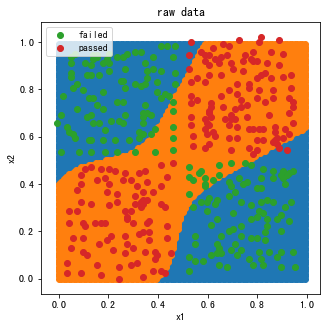

In [7]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.scatter(x_range[:, 0][y_range_predict_form == 0],
           x_range[:, 1][y_range_predict_form == 0])
ax.scatter(x_range[:, 0][y_range_predict_form == 1],
           x_range[:, 1][y_range_predict_form == 1])
failed = ax.scatter(X['x1'][y == 0], X['x2'][y == 0])
passed = ax.scatter(X['x1'][y == 1], X['x2'][y == 1])
ax.legend((failed, passed), ('failed', 'passed'))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('raw data')

好坏质检二分类mlp实战summary：  
1、通过mlp模型，在不增加特征项的情况下，实现了非线性二分类任务  
2、掌握了mlp模型的建立、配置与训练方法，并实现基于新数据的预测  
3、熟悉了mlp分类的预测数据格式，并实现格式转换  